# Ecommerce Analysis - Linear Regression Project

This project is part of the course 'Advanced Python for Machine Learning' and we are going to go through the cleaning process, exploratory data analysis and the machine learning part to train a Linear Regression model.


The data comes from an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

We begin by importing the file and using the head(), info() and describe() functions to take a look at the data

In [16]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [17]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


* Avg. Session Length: Average session of in-store style advice sessions (minutes)
* Time on App: Average time spent on App (minutes)
* Time on Website: Average time spent on Website (minutes)
* Length of Membership: How many years the customer has been a member (years)
* Yearly Amount Spent: The amount each customer spent in a year (dollars)

In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Now we start exploring the data

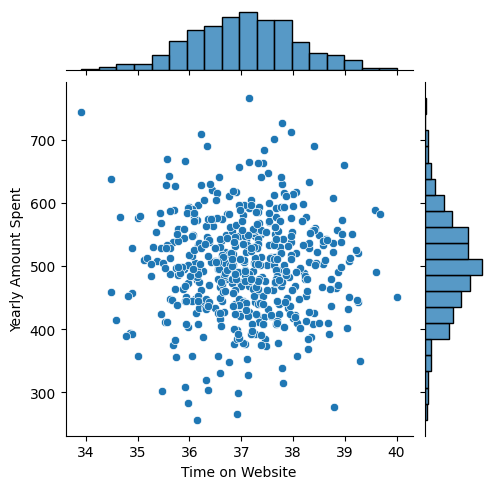

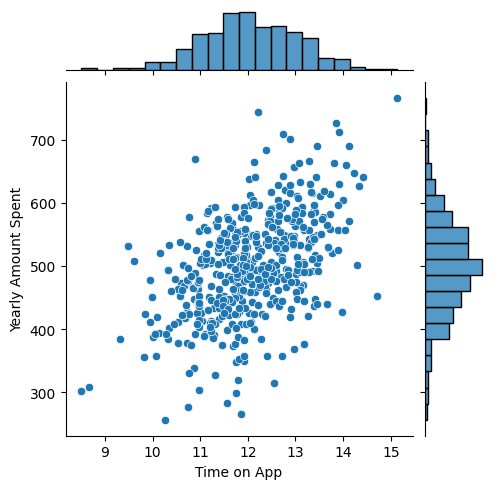

In [20]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent', height=5,)

sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent', height=5)

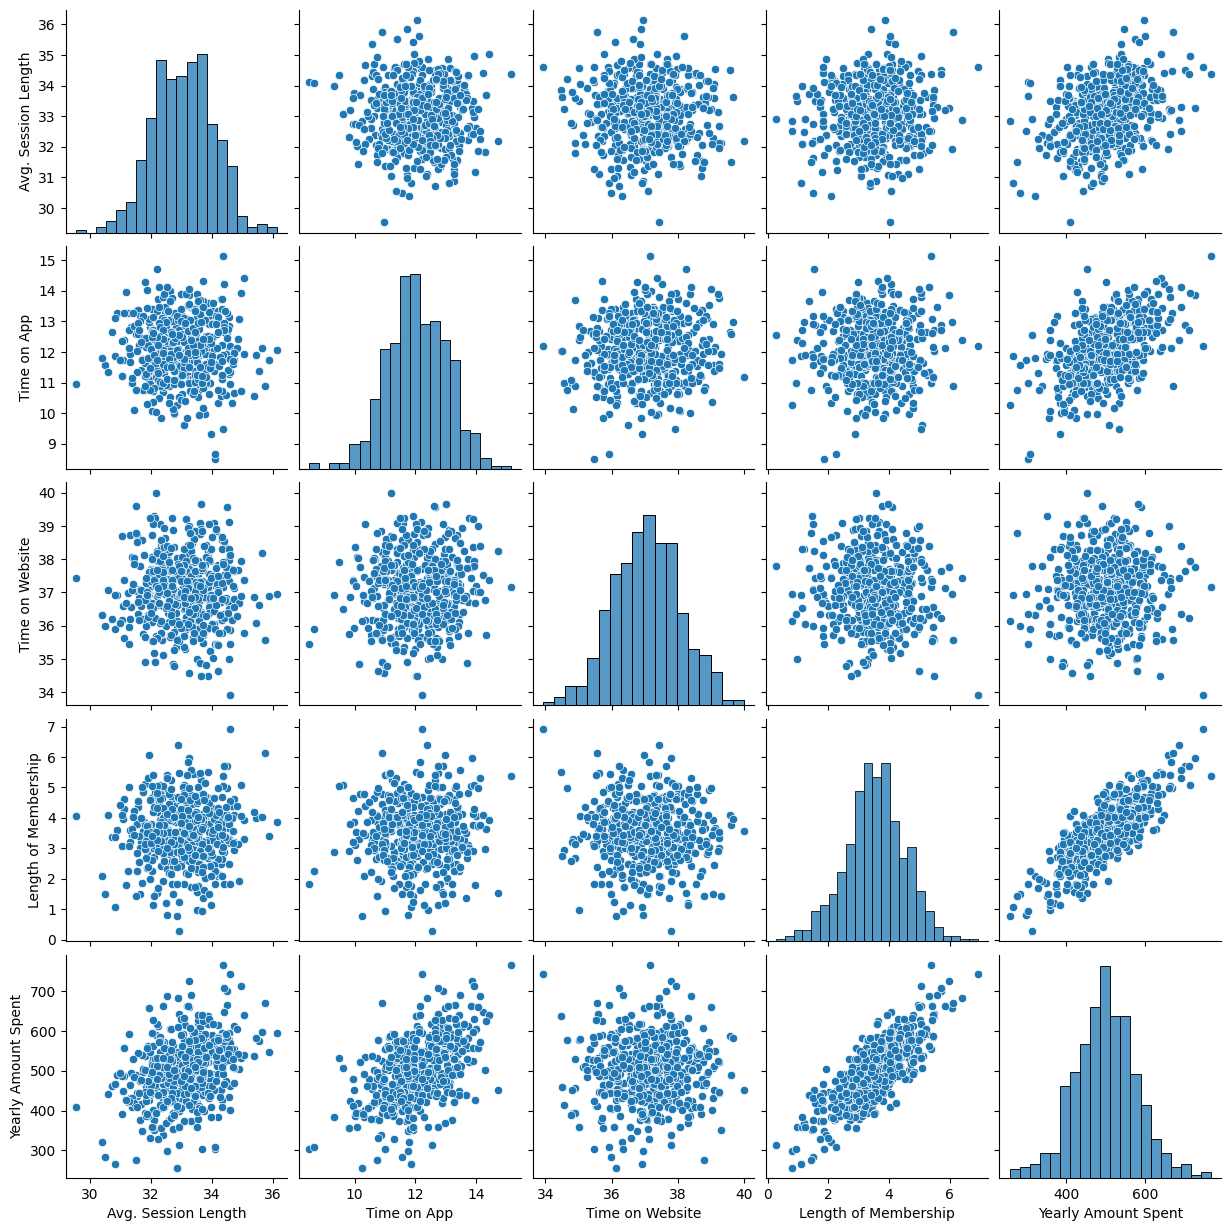

In [21]:
sns.pairplot(data=customers)

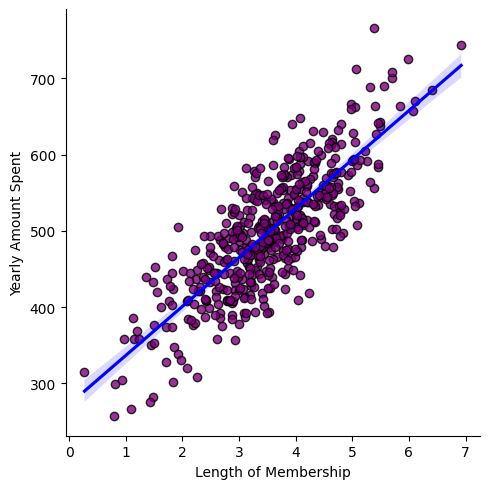

In [22]:
sns.lmplot(data=customers, x = 'Length of Membership', y = 'Yearly Amount Spent', 
           scatter_kws={'color': 'purple', 'edgecolor':'black'}, line_kws={'color': 'blue'})

Length of membership seems to be the most correlated feature with Yearly Amount Spent as it grows proportional.

We are going to train our model so it can calculate the Yearly Amount Spent by a customer in regards to other numerical values.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Set as dependent value the 'Yearly Amount Spent' and independent values the 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'

In [24]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = customers['Yearly Amount Spent']

We split the data and train our model on the 30%. Random_state is used so we can always have the same results. 

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
lm.fit(X_train, Y_train)

LinearRegression(n_jobs=1)

In [29]:
#print('Coefficients: \n', lm.coef_)
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


Using the trained model, we predict the other 70% of the data.

In [30]:
predictions = lm.predict(X_test)

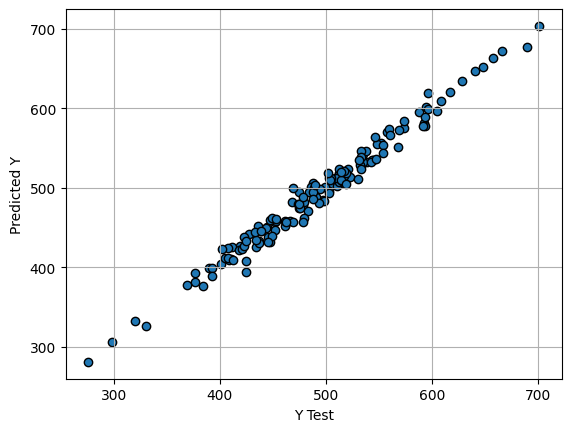

In [31]:
plt.scatter(Y_test,predictions, edgecolor = 'black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

Using the scatter plot we see the relation between Y_test and predictions. The straight line with slope near 1 shows good correlation.
To further prove the relation we create a displot of Y_test - prediction.

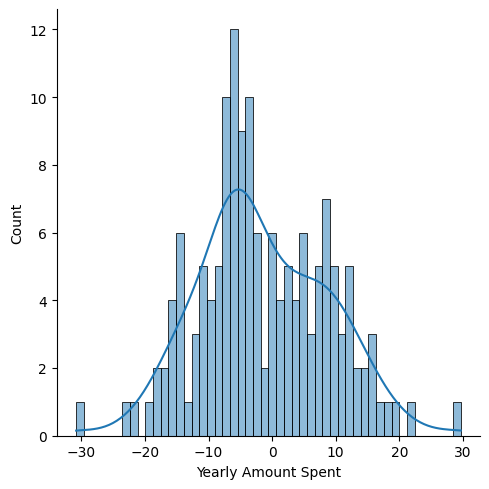

In [32]:
sns.displot(Y_test-predictions, bins=50, kde=True)

In [33]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 8.426091641432116
MSE: 103.91554136503333
RMSE: 10.193897260863155


The RMSE, which is the most important value for errors, is about 10 dollars.
in the scale of $500 of the mean amount spent yearly, the error seems to be about 2%, a great value!

In [34]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


As we can see from the numbers, the most important thing, for the Yearly Amount Spent to be increased, is the Length of Membership. This can be achieved by providing better and continious services so a customer won't have his membership cancelled. We can focus more on impoving the Session experience so it will last more and create more interest.

Improving the App UI to be more comfortable and appealing is a great step for success. As it seems, the time spent on mobile App is crucial for the amount each customer spends for the company in contrast to the time on website.

TO achieve this, there are two posibilities: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on other factors going on at the company. We could probably explore the relationship between Length of Membership and the App or the Website time spent before coming to a conclusion but as we can see from the pairplot, they do not seem to correlate.